In [18]:
# Manejo de datos y graficación 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [19]:
#graficar
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [20]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
#regresion
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [22]:
#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [23]:
archivo_csv = r"C:\Users\Nicolas\Desktop\Proyecto Analitica Compu\datos proyect.csv"
df = pd.read_csv(archivo_csv)

# Verifica que los datos se hayan cargado correctamente
print(df.head())
print(df.info())

    Date  RentedBikeCount  Hour  Temperature(C)  Humidity(%)  Windspeed(m/s)  \
0  43070              254     0            -5.2           37             2.2   
1  43070              204     1            -5.5           38             0.8   
2  43070              173     2            -6.0           39             1.0   
3  43070              107     3            -6.2           40             0.9   
4  43070               78     4            -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(C)  SolarRadiation(MJ/m2)  \
0             2000                   -17.6                    0.0   
1             2000                   -17.6                    0.0   
2             2000                   -17.7                    0.0   
3             2000                   -17.6                    0.0   
4             2000                   -18.6                    0.0   

   Rainfall(mm)  Snowfall(cm)  Seasons  Holiday  Costos  Ingresos  \
0           0.0           0.0      

In [24]:
# Mostrar la información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   RentedBikeCount            8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(C)             8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Windspeed(m/s)             8465 non-null   float64
 6   Visibility(10m)            8465 non-null   int64  
 7   Dewpointtemperature(C)     8465 non-null   float64
 8   SolarRadiation(MJ/m2)      8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall(cm)               8465 non-null   float64
 11  Seasons                    8465 non-null   int64  
 12  Holiday                    8465 non-null   int64  
 13  Costos                     8465 non-null   float

In [25]:
df.head()

Date  RentedBikeCount  Hour  Temperature(C)  Humidity(%)  Windspeed(m/s)  \
0  43070              254     0            -5.2           37             2.2   
1  43070              204     1            -5.5           38             0.8   
2  43070              173     2            -6.0           39             1.0   
3  43070              107     3            -6.2           40             0.9   
4  43070               78     4            -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(C)  SolarRadiation(MJ/m2)  \
0             2000                   -17.6                    0.0   
1             2000                   -17.6                    0.0   
2             2000                   -17.7                    0.0   
3             2000                   -17.6                    0.0   
4             2000                   -18.6                    0.0   

   Rainfall(mm)  Snowfall(cm)  Seasons  Holiday  Costos  Ingresos  \
0           0.0           0.0        4        0   20.66    264.58   
1           0.0           0.0        4        0   20.66    212.50   
2           0.0           0.0        4        0   20.66    180.21   
3           0.0           0.0        4        0   20.66    111.46   
4           0.0           0.0        4        0   20.66     81.25   

   UtilidadBruta  Amort-GastosFin-Impuestos  UtilidadNeta  
0         243.92                     218.20         25.72  
1         191.84                     171.18         20.66  
2         159.55                     142.03         17.52  
3          90.80                      79.96         10.83  
4          60.59                      52.69          7.90

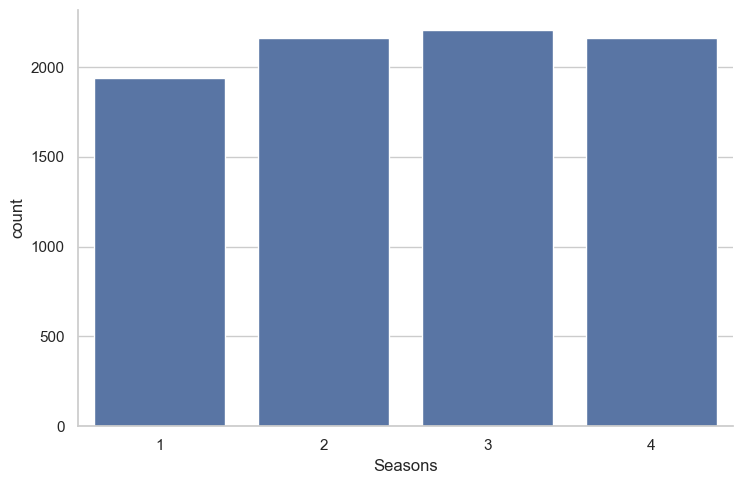

In [27]:
# Graficar "Seasons"
sns.catplot(x='Seasons', data=df, kind='count', height=5, aspect=1.5)


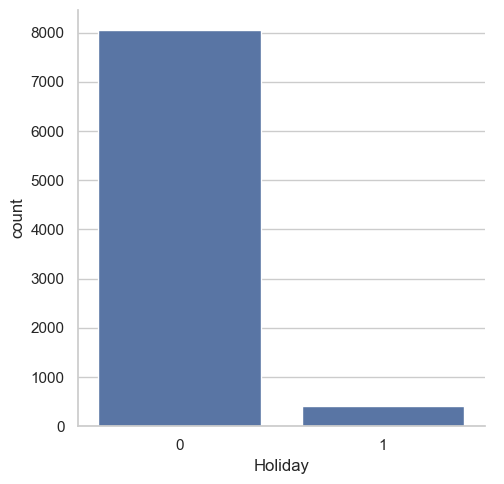

In [31]:
# Ver los valores únicos de la columna 'Holiday'
df.Holiday.value_counts()

sns.catplot(x='Holiday', data=df, kind='count', height=5, aspect=1)


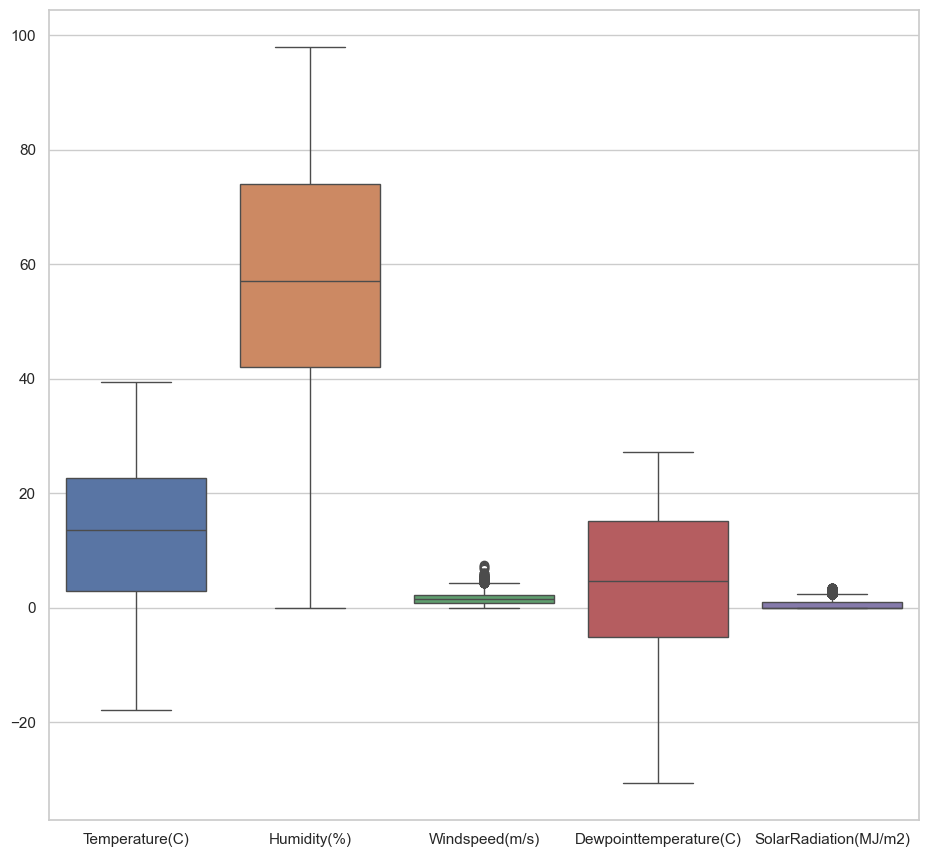

In [42]:
# just to visualize.
sns.boxplot(data=df[[ 'Temperature(C)', 'Humidity(%)', 
                   'Windspeed(m/s)',  'Dewpointtemperature(C)', 
                   'SolarRadiation(MJ/m2)']])
fig=plt.gcf()
fig.set_size_inches(10,10)

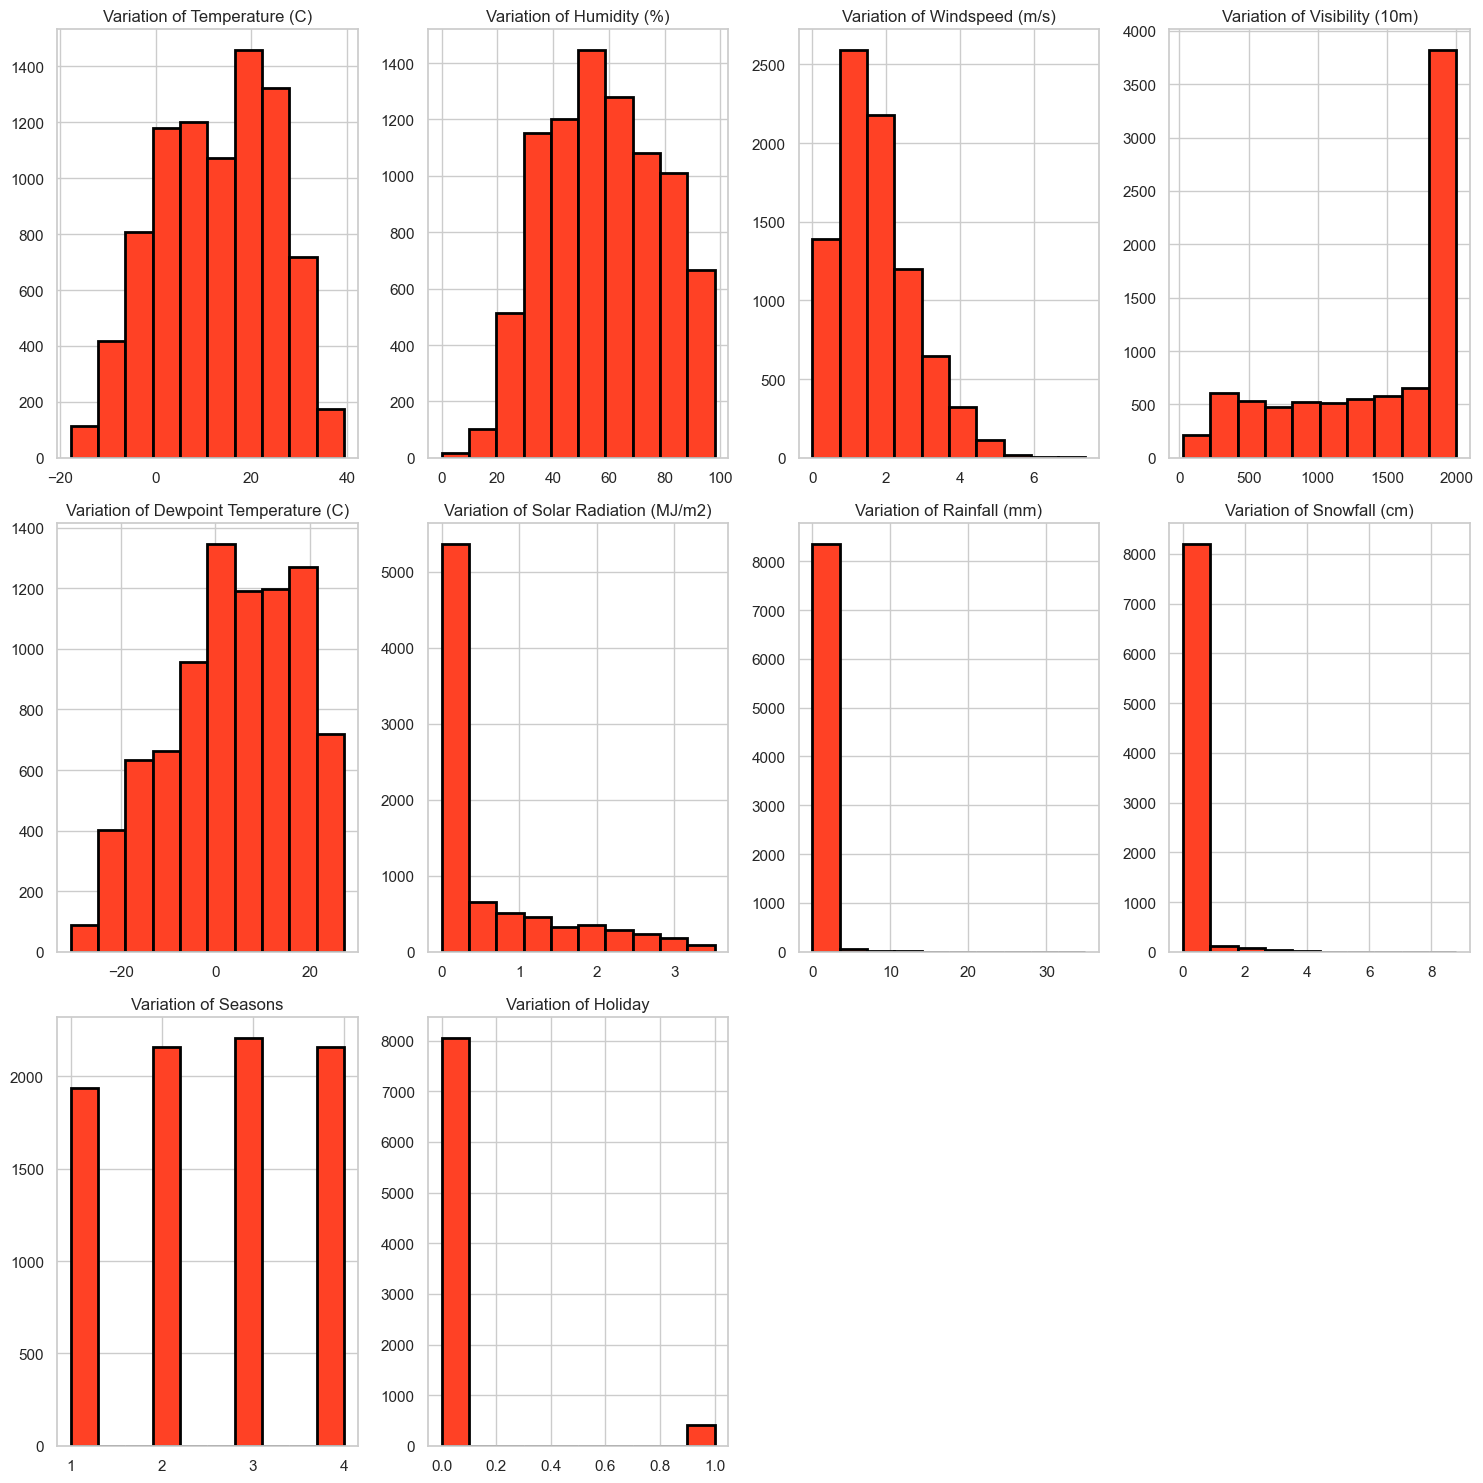

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(15, 15))

# Define the list of variables and their titles
variables = [
    ("Temperature(C)", "Variation of Temperature (C)"),
    ("Humidity(%)", "Variation of Humidity (%)"),
    ("Windspeed(m/s)", "Variation of Windspeed (m/s)"),
    ("Visibility(10m)", "Variation of Visibility (10m)"),
    ("Dewpointtemperature(C)", "Variation of Dewpoint Temperature (C)"),
    ("SolarRadiation(MJ/m2)", "Variation of Solar Radiation (MJ/m2)"),
    ("Rainfall(mm)", "Variation of Rainfall (mm)"),
    ("Snowfall(cm)", "Variation of Snowfall (cm)"),
    ("Seasons", "Variation of Seasons"),
    ("Holiday", "Variation of Holiday"),
    
]

# Iterate over the variables and plot histograms
for ax, (var, title) in zip(axes.flat, variables):
    ax.hist(df[var], edgecolor="black", linewidth=2, color='#ff4125')
    ax.set_title(title)

# Remove any empty subplots
for i in range(len(variables), len(axes.flat)):
    fig.delaxes(axes.flat[i])

fig.tight_layout()
plt.show()


<Axes: >

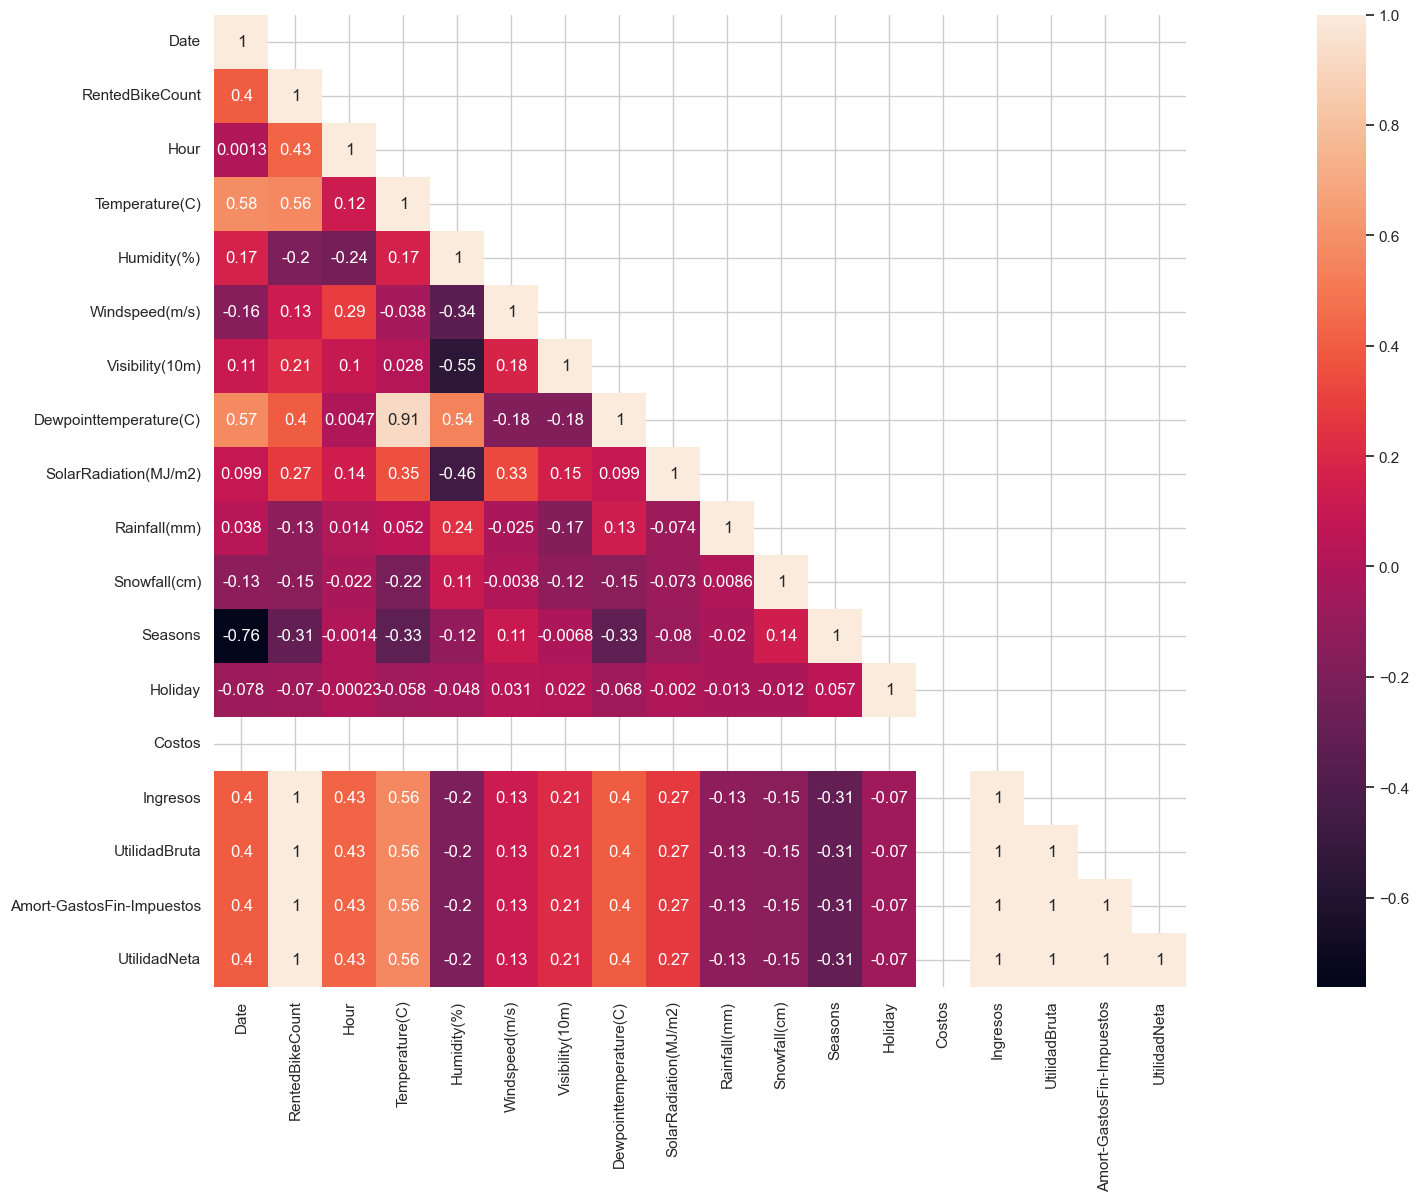

In [46]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [51]:
# Convertir 'Seasons' en variables dummie
seasons = pd.get_dummies(df['Seasons'], prefix='seasons')
df = pd.concat([df, seasons], axis=1)
df.head()




Date  RentedBikeCount  Hour  Temperature(C)  Humidity(%)  Windspeed(m/s)  \
0  43070              254     0            -5.2           37             2.2   
1  43070              204     1            -5.5           38             0.8   
2  43070              173     2            -6.0           39             1.0   
3  43070              107     3            -6.2           40             0.9   
4  43070               78     4            -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(C)  SolarRadiation(MJ/m2)  \
0             2000                   -17.6                    0.0   
1             2000                   -17.6                    0.0   
2             2000                   -17.7                    0.0   
3             2000                   -17.6                    0.0   
4             2000                   -18.6                    0.0   

   Rainfall(mm)  ...  Amort-GastosFin-Impuestos  UtilidadNeta  seasons_1  \
0           0.0  ...                     218.20         25.72      False   
1           0.0  ...                     171.18         20.66      False   
2           0.0  ...                     142.03         17.52      False   
3           0.0  ...                      79.96         10.83      False   
4           0.0  ...                      52.69          7.90      False   

   seasons_2  seasons_3  seasons_4  seasons_1  seasons_2  seasons_3  seasons_4  
0      False      False       True      False      False      False       True  
1      False      False       True      False      False      False       True  
2      False      False       True      False      False      False       True  
3      False      False       True      False      False      False       True  
4      False      False       True      False      False      False       True  

[5 rows x 26 columns]

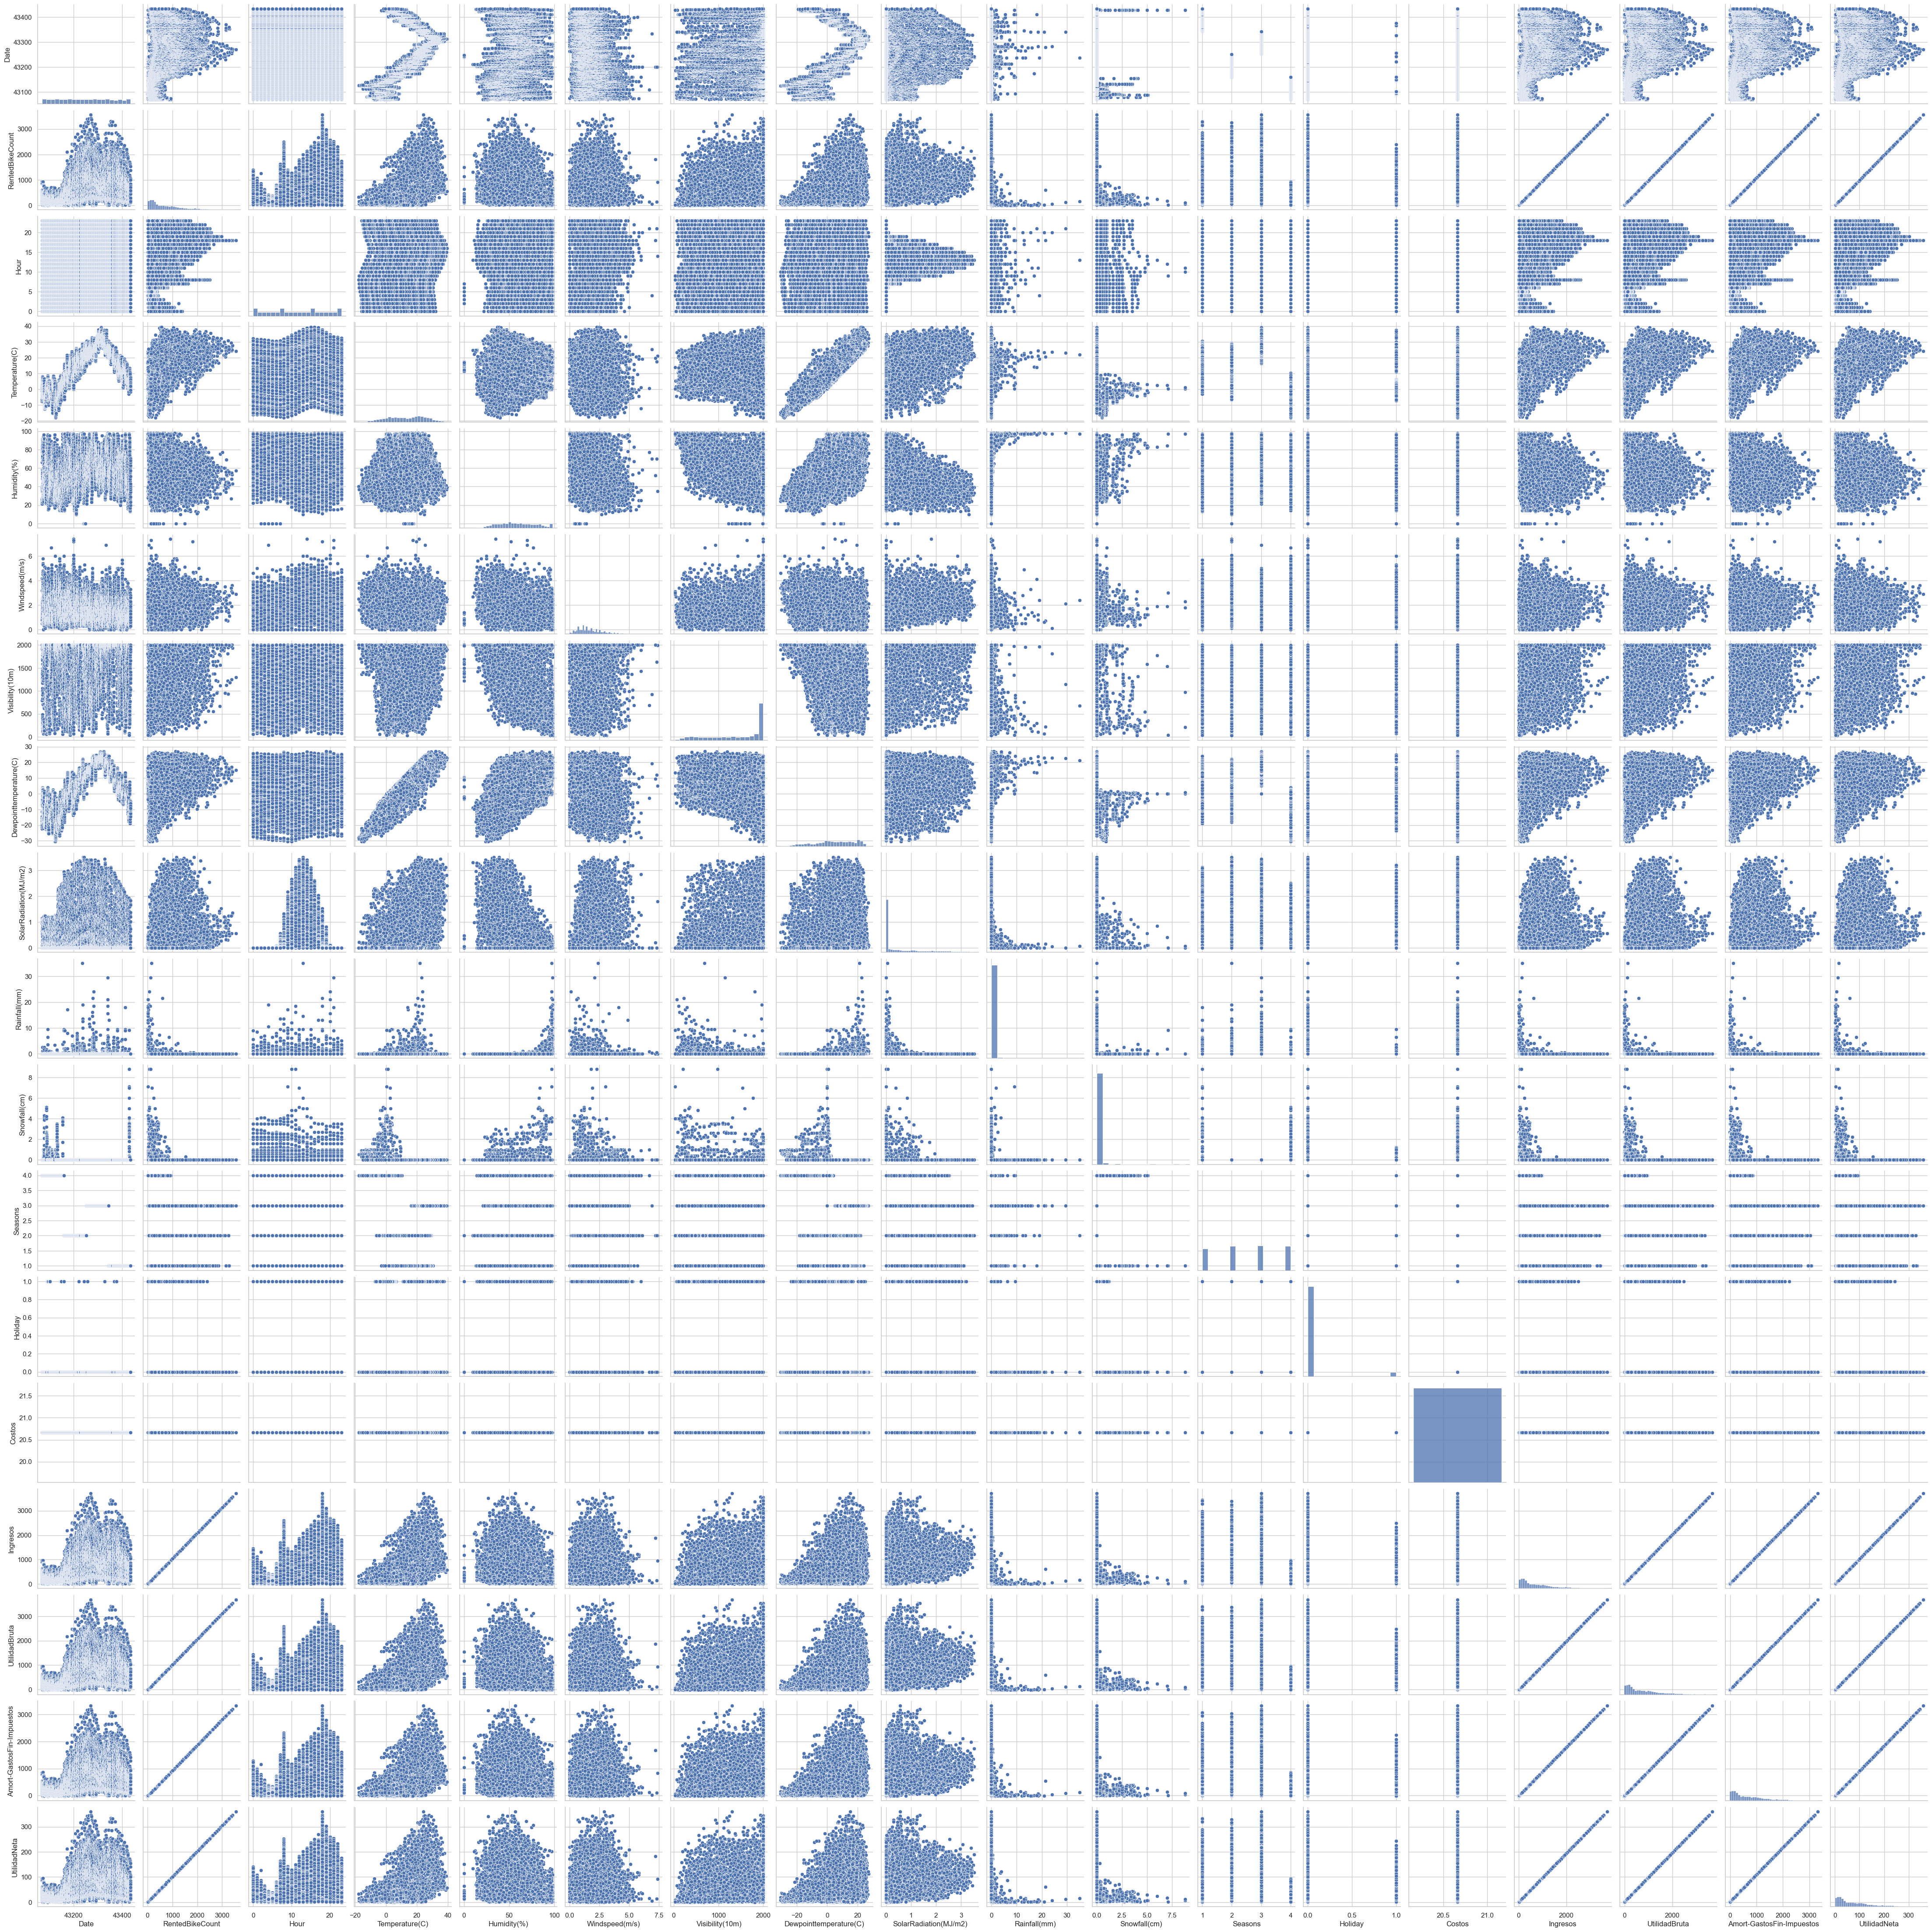

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Genera el pairplot
sns.pairplot(df_numeric)
plt.show()


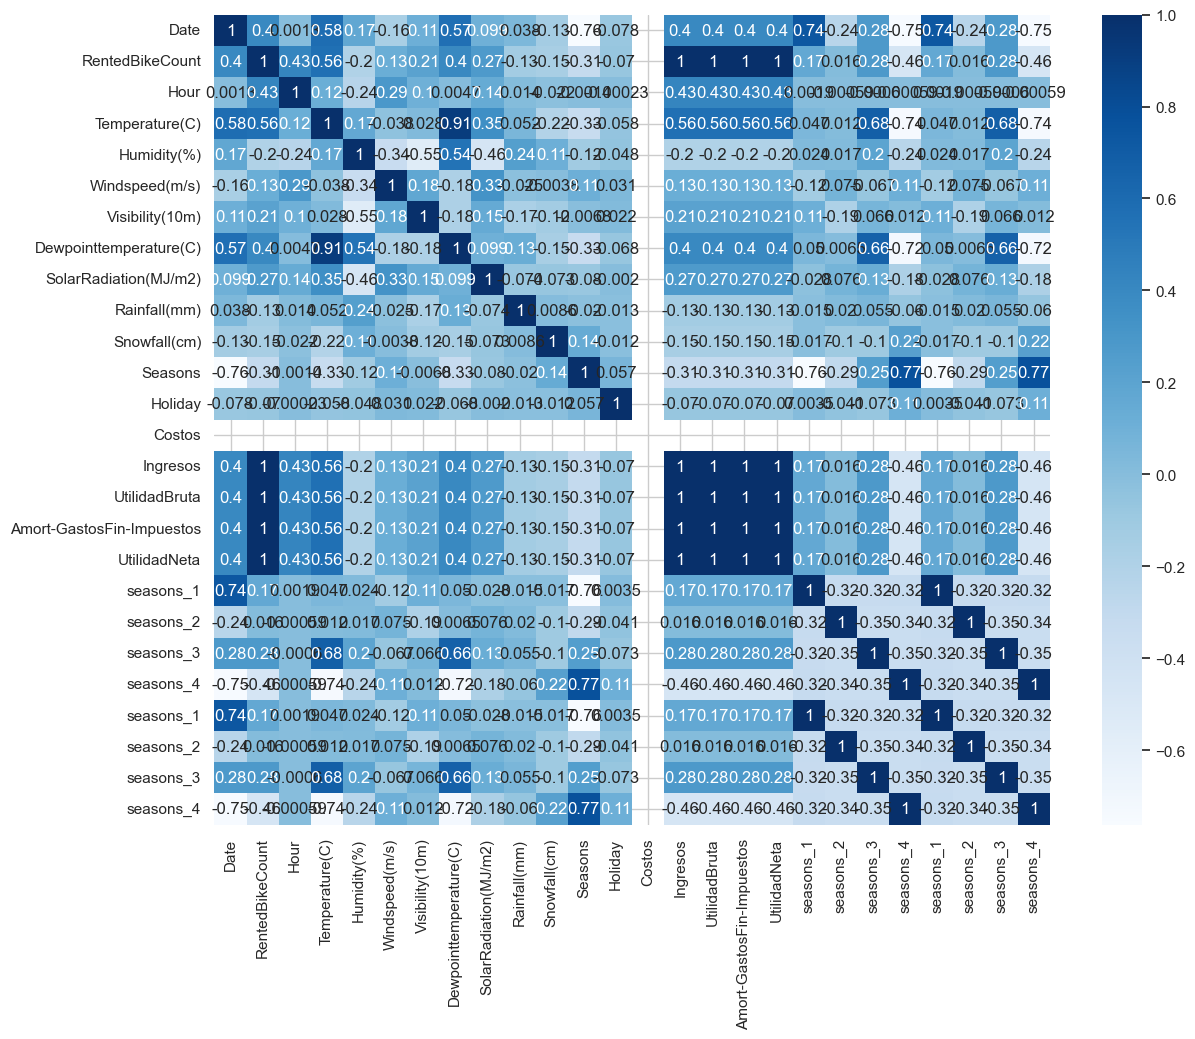

In [57]:
#MAtriz correlacion
import seaborn as sb
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))  # Ajusta el tamaño según tus necesidades

# Crear el mapa de calor
sb.heatmap(corr, cmap="Blues", annot=True)

# Mostrar el gráfico
plt.show()


In [62]:

# Variables a usar en el pairplot
x_vars = ['Temperature(C)', 'Humidity(%)', 'Windspeed(m/s)', 'Visibility(10m)', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Holiday', 'Seasons_1', 'Seasons_2', 'Seasons_3', 'Seasons_4']
y_var = 'RentedBikeCount'



In [63]:
import pandas as pd

# Variables a excluir
columns_to_exclude = ['Costos', 'Ingresos', 'UtilidadNeta', 'Date', 'Dewpointtemperature(C)']

# Variables independientes (X): todas las columnas excepto las excluidas y la variable dependiente
x_vars = [col for col in df.columns if col not in columns_to_exclude]

# Variable dependiente (y)
y_var = 'RentedBikeCount'

# Crear DataFrame de características
X = df[x_vars]

# Crear serie de variable objetivo
y = df[y_var]

# Mostrar las primeras filas de X y y
print("Características (X):")
print(X.head())

print("\nVariable objetivo (y):")
print(y.head())


Características (X):
   RentedBikeCount  Hour  Temperature(C)  Humidity(%)  Windspeed(m/s)  \
0              254     0            -5.2           37             2.2   
1              204     1            -5.5           38             0.8   
2              173     2            -6.0           39             1.0   
3              107     3            -6.2           40             0.9   
4               78     4            -6.0           36             2.3   

   Visibility(10m)  SolarRadiation(MJ/m2)  Rainfall(mm)  Snowfall(cm)  \
0             2000                    0.0           0.0           0.0   
1             2000                    0.0           0.0           0.0   
2             2000                    0.0           0.0           0.0   
3             2000                    0.0           0.0           0.0   
4             2000                    0.0           0.0           0.0   

   Seasons  ...  seasons_4  seasons_4  seasons_1  seasons_1  seasons_2  \
0        4  ...       True 

In [64]:
X.shape

(8465, 29)

In [67]:
# variable de respuesta
y = df['RentedBikeCount']

y.head()

0    254
1    204
2    173
3    107
4     78
Name: RentedBikeCount, dtype: int64

In [68]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [70]:
#para dividir entre datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [71]:
# cambiando el tamaño del conjunto de prueba a un 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

In [72]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1693, 29)
(1693,)
(6772, 29)
(6772,)


In [73]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [76]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [78]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-2.2168933355715126e-11
[ 1.00000000e+00 -7.53738157e-15  1.10432789e-15 -1.76388384e-16
  8.00306995e-15 -2.68020934e-17 -8.63196012e-15 -7.81177906e-15
 -4.29563026e-15  2.34530081e-15 -5.46956852e-15  1.44418544e-13
 -1.23221286e-12  0.00000000e+00  0.00000000e+00 -2.32478404e-16
 -2.32478405e-16 -1.88034400e-15 -1.88034400e-15  2.11282241e-15
  2.11282241e-15  0.00000000e+00  0.00000000e+00 -2.32478405e-16
 -2.32478405e-16 -1.88034400e-15 -1.88034400e-15  2.11282241e-15
  2.11282241e-15]


In [79]:
#revisar multicolinealida
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo que 'df' es tu DataFrame
# Definir las variables independientes (excluyendo 'RentedBikeCount' y 'Date')
X = df[['Hour', 'Temperature(C)', 'Humidity(%)', 'Windspeed(m/s)', 'Visibility(10m)',
        'Dewpointtemperature(C)', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday']]

# Añadir una constante para el cálculo del VIF
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                  Variable         VIF
0                    const  408.707959
1                     Hour    1.180353
2           Temperature(C)   88.521015
3              Humidity(%)   20.325963
4           Windspeed(m/s)    1.284038
5          Visibility(10m)    1.579449
6   Dewpointtemperature(C)  117.011597
7    SolarRadiation(MJ/m2)    2.011424
8             Rainfall(mm)    1.084698
9             Snowfall(cm)    1.105914
10                 Seasons    1.156909
11                 Holiday    1.007164


In [83]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Suponiendo que 'df' es tu DataFrame y 'RentedBikeCount' es la variable dependiente
# Definir variables independientes con bajo VIF
X = df[['Hour', 'Windspeed(m/s)', 'Visibility(10m)', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday']]
y = df['RentedBikeCount']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Ajustar el modelo de regresión
X_train = sm.add_constant(X_train)  # Añadir constante
model = sm.OLS(y_train, X_train).fit()

# Resumen del modelo
print(model.summary())

# Evaluar el modelo en el conjunto de prueba
X_test = sm.add_constant(X_test)  # Añadir constante
y_pred = model.predict(X_test)

# Puedes usar métricas como MAE, MSE, R², etc., para evaluar el rendimiento del modelo


                            OLS Regression Results                            
Dep. Variable:        RentedBikeCount   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     120.4
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          1.75e-159
Time:                        11:52:40   Log-Likelihood:                -12963.
No. Observations:                1693   AIC:                         2.594e+04
Df Residuals:                    1684   BIC:                         2.599e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   530.56

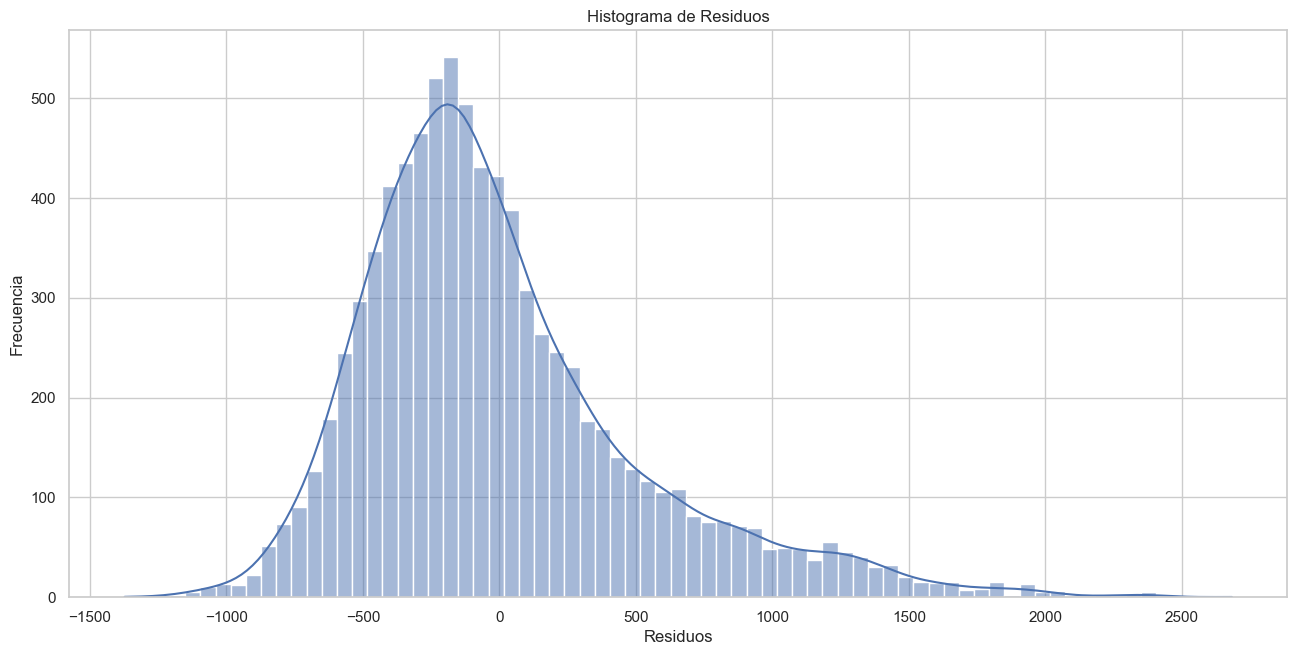

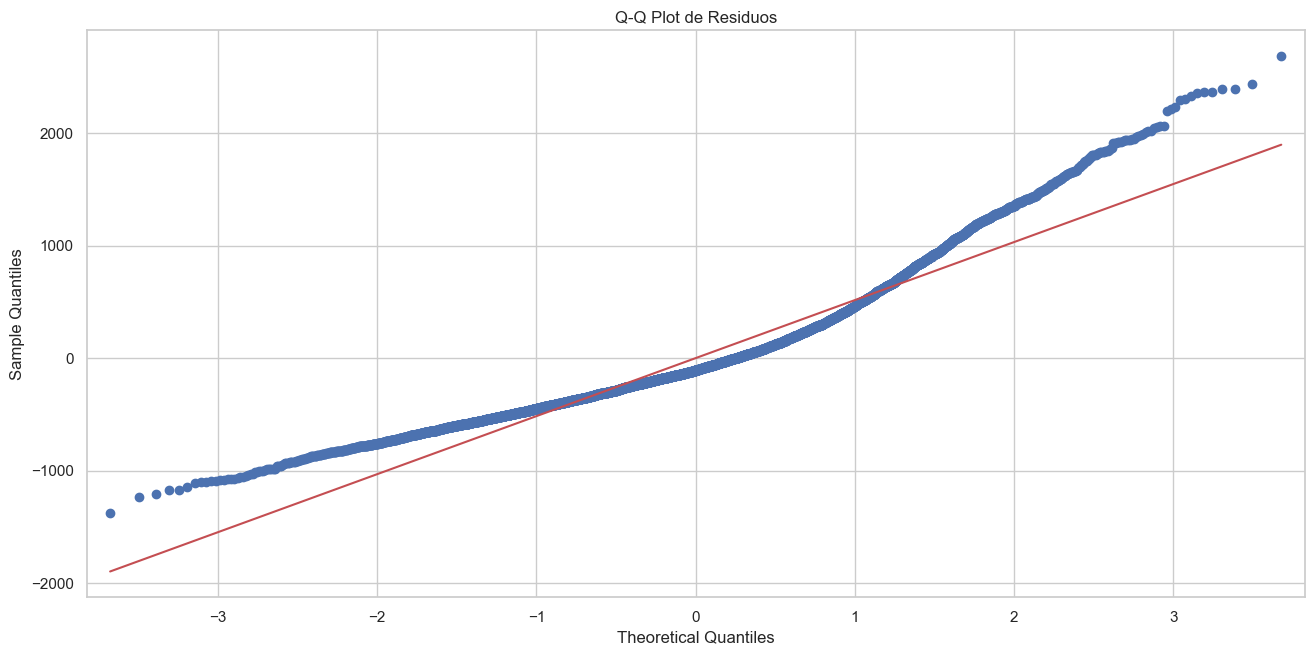

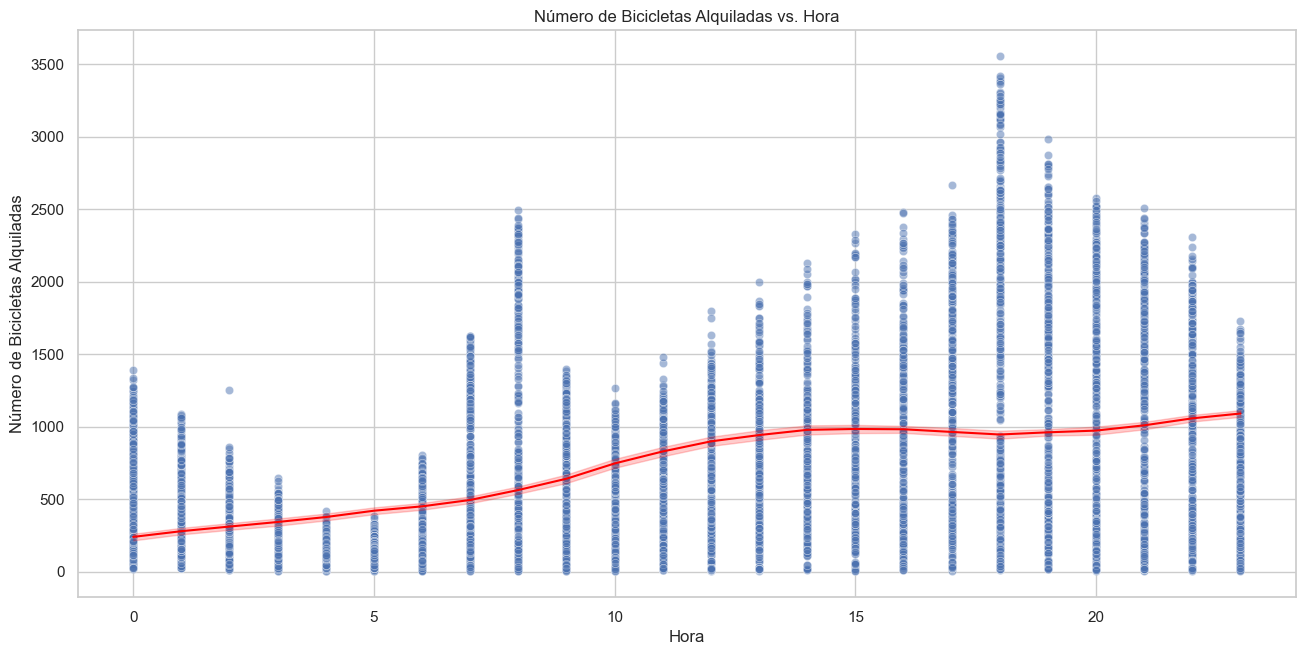

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Definir variables independientes y dependientes
X = df[['Hour', 'Windspeed(m/s)', 'Visibility(10m)', 'SolarRadiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday']]
y = df['RentedBikeCount']

# Añadir constante y ajustar el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Predicciones
y_pred = model.predict(X)
residuals = y - y_pred



# 1. Histograma de residuos
plt.figure(figsize=(14, 7))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# 2. Q-Q Plot de residuos
plt.figure(figsize=(14, 7))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de Residuos')
plt.show()

# 3. Diagrama de dispersión entre RentedBikeCount y una variable independiente (ejemplo: Hour)
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['Hour'], y=df['RentedBikeCount'], alpha=0.5)
sns.lineplot(x=df['Hour'], y=y_pred, color='red')
plt.xlabel('Hora')
plt.ylabel('Número de Bicicletas Alquiladas')
plt.title('Número de Bicicletas Alquiladas vs. Hora')
plt.show()
